# Announcements
- __Please familiarize yourself with the term projects, and sign up for your (preliminary) choice__ using [this form](https://forms.gle/ByLLpsthrpjCcxG89). _You may revise your choice, but I'd recommend settling on a choice well before Thanksgiving._
- Problem Set 5 posted on D2L, due Oct 20.
- __Outlook__: algorithms for solving high-dimensional linear and non-linear equations; then Boundary Value Problems and Partial Differential Equations.
- Conference for Undergraduate Women in Physics: online event in 2021, [applications accepted until 10/25](https://www.aps.org/programs/women/cuwip/)

This notebook presents as selection of topics from the book "Numerical Linear Algebra" by Trefethen and Bau (SIAM, 1997), and uses notebooks by Kyle Mandli.

# Conditioning and Stability

Once an approximation to a linear system is constructed the next question is how much trust can we put in the approximation? Since the true solution is not known, one of the few tools we have is to ask how well the approximation matches the original equation. In other words, we seek a solution to a system,
$$
    \vec{f}(\vec{x}) = \vec{b}. 
$$

We do not have $\vec{x}$ but instead have an approximation, $\hat{x}$, and we hope that 
$$
    \vec{f}(\hat{x}) \approx \vec{b}.
$$
In this section the question we explore is to try to determine a bound on the relative error, $\frac{||\vec{x}-\hat{x}||}{||\vec{x}||}$ given the matrix, $A$. 

This leads to the notion of conditioning. Conditioning is the behavior of a problem when the solution is a changed a small bit (perturbed), and it is a  mathematical (analytic) property of the original system of equations.  Stability, on the other hand, is concerned with how the algorithm used to obtain an approximation behaves when the approximation is perturbed.

## Conditioning and Condition Numbers

A **well-conditioned** problem is one where a small perturbation to the original problem leads to only small changes in the solution.

Formally we can think of a function $f$ which maps $x$ to $y$

$$
    f(x) = y \quad \text{or} \quad f: X \rightarrow Y.
$$

Let $x \in X$ where we perturb $x$ with $\delta x$ and we ask how the result $y$ changes:

$$
    ||f(x) - f(x + \delta x)|| \leq C ||x - (x+\delta x)||
$$

for some constant $C$ possible dependent on $\delta x$ depending on the type of conditioning we are considering.

### Absolute Condition Number

If we let $\delta x$ be the small perturbation to the input and $\delta f = f(x + \delta x) - f(x)$ be the result the **absolute condition number** $\hat{~\kappa}$ can be defined as

$$
    \hat{\!\kappa} = \sup_{\delta x} \frac{||\delta f||}{||\delta x||}
$$

for most problems (assuming $\delta f$ and $\delta x$ are both infinitesimal).  

When $f$ is differentiable we can evaluate the condition number via the Jacobian.  Recall that the derivative of a multi-valued function can be termed in the form of a Jacobian $J(x)$ where
$$
    [J(x)]_{ij} = \frac{\partial f_i}{\partial x_j}(x).
$$

This allows us to write the infinitesimal $\delta f$ as
$$
    \delta f \approx J(x) \delta x
$$
with equality when $||\delta x|| \rightarrow 0$.  Then we can write the condition number as
$$
    \hat{\!\kappa} = ||J(x)||
$$
where the norm is the one induced by the spaces $X$ and $Y$.

### Relative Condition Number

The **relative condition number** is defined similarly and is related to the difference before between the absolute error and relative error as defined previously.  With the same caveats as before it can be defined as
$$
    \kappa = \sup_{\delta x} \left( \frac{\frac{||\delta f||}{||f(x)||}}{\frac{||\delta x||}{||x||}} \right).
$$

Again if $f$ is differentiable we can use the Jacobian $J(x)$ to evaluate the relative condition number as
$$
    \kappa = \frac{||J(x)||}{||f(x)|| ~/ ~||x||}.
$$

#### Example
Calculate the relative condition number of $\sqrt{x}$ for $x > 0$. 

$$
    f(x) = \sqrt{x}, \quad J(x) = f'(x) = \frac{1}{2 \sqrt{x}} \\
    \kappa = \frac{||J(x)||}{||f(x)|| / ||x||} = \frac{1}{2 \sqrt{x}} \frac{x}{\sqrt{x}} = \frac{1}{2}
$$

The condition number of a function was discussed in general terms above. Now, we examine the more specific case of a linear function, a matrix-vector multiplication. Here we let $\vec{f}(\vec{x})=Ax$ and determine the condition number by perturbing $x$.

We begin with the definition above,
$$\begin{aligned}
    \kappa &= \sup_{\delta x} \left ( \frac{||A (\vec{x}+\delta x) - A \vec{x}||}{||A\vec{x}||} \frac{||\vec{x}||}{||\delta x||}\right ), \\
    &= \sup_{\delta x} \frac{ ||A \delta x||}{||\delta x||} \frac{||\vec{x}||}{||A\vec{x}||}, \\
    &= ||A|| \frac{||\vec{x}||}{||A \vec{x}||},
\end{aligned}$$
where $\delta x$ is a vector.

If $A$ has an inverse, then we note that
$$
\begin{align}
 \vec{x} &= A^{-1}A \vec{x}, \\
 \Rightarrow ||\vec{x}|| &= || A^{-1}A \vec{x} ||, \\
                         &\leq ||A^{-1}|| || A \vec{x} ||,
\end{align}
$$
which implies that
$$
    \frac{||x||}{||A x||} \leq ||A^{-1}||.
$$
_We can now bound the condition number for a matrix by_
$$
    \kappa \leq ||A|| ||A^{-1}||.
$$

### Condition Number of a Matrix

The condition number of a matrix is defined by the product
$$
    \kappa(A) = ||A||~||A^{-1}||.
$$
where here we are thinking about the matrix rather than a problem.  If $\kappa$ is small than $A$ is said to be **well-conditioned**.  If $A$ is singular we assign $\kappa(A) = \infty$ as the matrix's condition number.

When we are considering the $\ell_2$ norm then we can write the condition number as

$$
    \kappa(A) = \frac{\sqrt{\rho(A^\ast A)}}{\sqrt{\rho((A^\ast A)^{-1})}} = \frac{\sqrt{\max |\lambda|}}{\sqrt{\min |\lambda|}}.
$$

### Condition Number of a System of Equations

Another way to think about the conditioning of a problem we have looked at before is that the matrix $A$ itself is an input to the problem.  Consider than the system of equations $A\vec{x} = \vec{b}$ where we will perturb both $A$ and $\vec{x}$ resulting in
$$
    (A + \delta A)(\vec{x} + \delta x) = \vec{b}.
$$

Assuming we solve the problem exactly we know that $A\vec{x} = \vec{b}$ and that the infinitesimals multiplied $\delta A \delta x$ are smaller than the other term, and the above expression can be approximation by
$$
\begin{aligned}
    (A + \delta A)(\vec{x} + \delta x) &= \vec{b}, \\
    A\vec{x} + \delta Ax + A \delta x + \delta A \delta \vec{x} &= \vec{b} \\
    \delta A\vec{x} + A \delta x & = 0
\end{aligned}
$$

Solving for $\delta x$ leads to 
$$
    \delta x = -A^{-1} \delta A \vec{x}
$$
implying
$$
    ||\delta x|| \leq ||A^{-1}|| ~ ||\delta A|| ~ ||\vec{x}||
$$
and therefore
$$
    \frac{\frac{||\delta x||}{||\vec{x}||}}{\frac{||\delta A||}{||A||}} \leq ||A^{-1}||~||A|| = \kappa(A).
$$

We can also say the following regarding the condition number of a system of equations then

**Theorem:**  Let $\vec{b}$ be fixed and consider the problem of computing $\vec{x}$ in $A\vec{x} = \vec{b}$ where $A$ is square and non-singular.  The condition number of this problem with respect to perturbations in $A$ is the condition number of the matrix $\kappa(A)$.

## Stability

We now return to the consideration of the fact that we are interested not only in the well-conditioning of a mathematical problem but in how we might solve it on a finite precision machine.  In some sense conditioning describes how well we can solve a problem in exact arithmetic and stability how well we can solve the problem in finite arithmetic.  

### Accuracy and Stability

As we have defined before we will consider **absolute error** as
$$
    ||F(x) - f(x)||
$$
where $F(x)$ is the approximation to the true solution $f(x)$.  Similarly we can define **relative error** as
$$
    \frac{||F(x) - f(x)||}{||f(x)||}.
$$
In the ideal case we would like the relative error to be $\mathcal{O}(\epsilon_{\text{machine}})$.

#### Forwards Stability

A **forward stable** algorithm for $x \in X$ has

$$
    \frac{||F(x) - f(x)||}{||f(x)||} = \mathcal{O}(\epsilon_{\text{machine}})
$$

In other words
> A forward stable algorithm gives almost the right answer to exactly the right question.

#### Backwards Stability

A stronger notion of stability can also be defined which is satisfied by many approaches in numerical linear algebra.  We say that an algorithm $F$ is **backward stable** if for $x \in X$ we have

$$
    F(x) = f(\hat{\!x})
$$

for some $\hat{\!x}$ with

$$
    \frac{||\hat{\!x} - x||}{||x||} = \mathcal{O}(\epsilon_{\text{machine}}).
$$

In other words
> A backward stable algorithm gives exactly the right answer to nearly the right question.

Combining these ideas along with the idea that we should not expect to be able to accurately compute the solution to a poorly conditioned problem we can form the mixed forward-backward sense of stability as for $x \in X$ if

$$
    \frac{||F(x) - f(\hat{\!x})||}{||f(\hat{\!x})||} = \mathcal{O}(\epsilon_{\text{machine}})
$$

for some $\hat{\!x}$ with 

$$
    \frac{||\hat{\!x} - x||}{||x||} = \mathcal{O}(\epsilon_{\text{machine}}).
$$

In other words
> A stable algorithm gives nearly the right answer to nearly the right question.

_An important aspect of the above statement is that we can not necessarily guarantee an accurate result.  If the condition number $\kappa(x)$ is small we would expect that a stable algorithm would give us an accurate result (by definition).  This is reflected in the following theorem._

**Theorem:**  Suppose a backward stable algorithm is applied to solve a problem $f: X \rightarrow Y$ with condition number $\kappa$ on a finite precision machine, then the relative errors satisfy
$$
    \frac{||F(x) - f(\hat{\!x})||}{||f(\hat{\!x})||} = \mathcal{O}(\kappa(x) ~ \epsilon_{\text{machine}}).
$$

**Proof:**  By the definition of the condition number of a problem we can write
$$
    \frac{||F(x) - f(\hat{\!x})||}{||f(\hat{\!x})||} \leq (\kappa(x) + \mathcal{O}(\epsilon_{\text{machine}}))\frac{||\hat{\!x} - x||}{||x||}.
$$
Combining this with the definition of backwards stability we can arrive at the statement of the theorem.

To summarize:
> **Backward Error Analysis** - Process of using the condition number of the problem and stability of the algorithm to determine the error.

> **Forward Error Analysis** - Considers the accrual of error at each step of an algorithm given slightly perturbed input.

# Eigenproblems

## Overview

We will now consider eigenproblems of the form
$$
    A x = \lambda x
$$
where $A \in \mathbb C^{m \times m}$, $x \in \mathbb C^m$ and $\lambda \in \mathbb C$.  The vector $x$ is known as the **eigenvector** and $\lambda$ the **eigenvalue**.  The set of all eigenvalues is called the **spectrum** of $A$.

### Eigenvalue Decomposition
Similar to QR factorization, an eigendecomposition is possible such that $A$ can be written as

$$
    A = X \Lambda X^{-1}
$$

where $X$ is the matrix formed by the eigenvectors $x$ as its columns and $\Lambda$ is a diagonal matrix with the eigenvalues along its diagonal.  

This equation comes from the similar equation $A X = X \Lambda$ which is of course related to the original problem statement.  This latter equation can be written out as

$$
    \begin{bmatrix} 
          &   &   &   &   \\
          &   &   &   &   \\
          &   & A &   &   \\
          &   &   &   &   \\
          &   &   &   &  
    \end{bmatrix}
    \begin{bmatrix} 
          &   &   &   &   \\
          &   &   &   &   \\
        x_1 & x_2 & \cdots & x_{m-1} & x_m \\
          &   &   &   &   \\
          &   &   &   &  
    \end{bmatrix} = 
    \begin{bmatrix} 
          &   &   &   &   \\
          &   &   &   &   \\
        x_1 & x_2 & \cdots & x_{m-1} & x_m \\
          &   &   &   &   \\
          &   &   &   &  
    \end{bmatrix}
    \begin{bmatrix} 
        \lambda_1 &   &   &   &   \\
          & \lambda_2 &   &   &   \\
          &   & \ddots &   &   \\
          &   &   & \lambda_{m-1} &   \\
          &   &   &   & \lambda_m
    \end{bmatrix}
$$

Here we note that the eigenpair $(x_j, \lambda_j)$ are matched as the $j$th column of $X$ and the $j$th element of $\Lambda$ on the diagonal. 

**Algebraic multiplicity** is the number of times overall an eigenvalue repeats itself.

**Geometric multiplicity** is defined as the number of linearly independent eigenvectors that belong to each eigenvalue.

If the algebraic multiplicity is equal to the geometric multiplicity for all $\lambda$ then we can say that there is a full eigenspace.

#### Example:  Computing Multiplicities

Compute the geometric and algebraic multiplicities for the following matrices.  What is the relationship between the algebraic and geometric multiplicities?

$$A = \begin{bmatrix} 
    2 &   &  \\
      & 2 &  \\
      &   & 2 
\end{bmatrix}$$

$$B = \begin{bmatrix} 2
      & 1 &   \\
      & 2 & 1 \\
      &   & 2 
\end{bmatrix}$$

1. The characteristic polynomial of $A$ is
  
  $$
      \mathcal{P}_A(z) = (2 - z)(2 - z)(2 - z) = (2 - z)^3
  $$
  
  so the eigenvalues are all $\lambda = 2$ so we know the algebraic multiplicity is 3 of this eigenvalue.  The geometric multiplicity is determined by the number of linearly independent eigenvectors.  For this matrix we have three eigenvectors that are all linearly independent which happen to be the unit vectors in each direction (check!).  This means that the geometric multiplicity is also 3.

1. The characteristic polynomial of $B$ is the same as $A$ so again we know $\lambda = 2$ but now we need to be a bit careful about the eigenvectors.  In this case the only eigenvector is a scalar multiple of $e_1$ so the geometric multiplicity is 1.

### Interpretations of the Eigenspace

One way to interpret the eigenproblem is that of one that tries to find the subspaces of $\mathbb C^m$ which act like scalar multiplication by $\lambda$.  The eigenvectors associated with one eigenvalue then form a subspace of $S \subseteq \mathbb C^m$.

When an eigenvalue has algebraic multiplicity that equals its geometric then it is called non-defective and otherwise defective.  This property is also inherited to the matrix so in the above example $A$ and $B$ are non-defective and defective matrices respectively.

### Determinant and Trace

Two important properties of matrices have important relationships with their eigenvalues, namely the determinant and trace.  The determinant we have seen, the **trace** is defined as the sum of the elements on the diagonal of a matrix, in other words
$$
    \text{tr}(A) = \sum^m_{i=1} A_{ii}.
$$

The relationship between the determinant and the eigenvalues is not difficult to guess due to the nature of the characteristic polynomial.  The trace of a diagonal matrix is clear and provides another suggestion to the relationship.

**Theorem:** The determinant $\det(A)$ and trace $\text{trace}(A)$ are equal to the product and sum of the eigenvalues of $A$ respectively counting algebraic multiplicity.

### Similarity Transformations

The relationship between a matrix's eigenvalues and its determinant and trace are due to the special relationship between the eigenvalue decomposition and what is called similarity transformations.  A **similarity transformation** is defined as a transformation that takes A and maps it to $X^{-1} A X$ (assuming $X$ is non-singular).  Two matrices are said to be **similar** if there is a similarity transformation between them.  

The most important property of similar matrices is that they have the same characteristic polynomial, eigenvalues, and multiplicities.

This allows us to relate geometric and algebraic multiplicity as 

**Theorem:** The algebraic multiplicity of an eigenvalue $\lambda$ is at least as great as its geometric multiplicity.

### Schur Factorization

A **Schur factorization** of a matrix $A$ is defined as

$$
    A = Q T Q^\ast
$$

where $Q$ is unitary and $T$ is upper-triangular.  In particular note that due do the structure of the resulting characteristic polynomial that $A$ and $T$ have identical eigenvalues. 

**Theorem:** Every matrix $A \in \mathbb C^{m \times m}$ has a Schur factorization.

Note that the above results imply the following
 - An eigen-decomposition $A = X \Lambda X^{-1}$ exists if and only if $A$ is non-defective (it has a complete set of eigenvectors)
 - A unitary transformation $A = Q \Lambda Q^\ast$ exists if and only if $A$ is normal ($A^\ast A = A A^\ast$)
 - A Schur factorization always exists
 
Note that each of these lead to a means for isolating the eigenvalues of a matrix and will be useful when considering algorithms for finding them.

## Condition Number of a Simple Eigenvalue

Before we discuss a number of approaches to computing eigenvalues it good to consider what the condition number of a given eigenproblem is.  

Let 
$$
    Ax = \lambda x
$$ 
define the eigenvalue problem in question.  Here we will introduce a related problem 
$$
    y^\ast A = \lambda y^\ast
$$ 
where $y$ is the **left eigenvector** and from before $x$ is the **right eigenvector**.  These vectors also can be shown to have the relationship $y^\ast x \neq 0$ for a simple eigenvalue.

Now consider the perturbed problem
$$
    (A + \delta A) (x + \delta x) = (\lambda + \delta \lambda) (x + \delta x).
$$
Expanding this and throwing out quadratic terms and removing the eigenproblem we have
$$
    \delta A x + A \delta x = \delta \lambda x + \lambda \delta x.
$$

Multiple both sides of the above by the left eigenvector and use $y^\ast x \neq 0$ to find
$$\begin{aligned}
    y^\ast \delta A x + y^\ast A \delta x &= y^\ast \delta \lambda x + y^\ast \lambda \delta x \\
    y^\ast \delta A x &= y^\ast \delta \lambda x
\end{aligned}$$
where we again use the slightly different definition of the eigenproblem.  We can then solve for $\delta \lambda$ to find
$$
    \delta \lambda = \frac{y^\ast \delta A x}{y^\ast x}
$$
meaning that the ratio between the dot-product of the left and right eigenvectors and the conjugate dot-product of the matrix $\delta A$ then form a form of bound on the expected error in the simple eigenvalue.

## Computing Eigenvalues

The most obvious approach to computing eigenvalues is a direct computation of the roots of the characteristic polynomial.  Unfortunately the following theorem suggests this is not a good way to compute eigenvalues:

**Theorem:** For an $m \geq 5$ there is a polynomial $\mathcal{P}(z)$ of degree $m$ with rational coefficients that has a real root $\mathcal{P}(z_0) = 0$ with the property that $z_0$ cannot be written using any expression involving rational numbers, addition, subtraction, multiplication, division, and $k$th roots.

Not all is lost however, we just cannot use any direct methods to solve for the eigenvalues.  Instead we must use an iterative approach, in other words we want to construct a sequence that converges to the eigenvalues.  How does this relate to how we found roots previously?

Almost all approaches to computing eigenvalues do so through the computation of the Schur factorization.  The Schur factorization, as we have seen, will preserve the eigenvalues.  The steps to compute the Schur factorization are usually broken down into two steps
1. Directly transform $A$ into a **Hessenberg** matrix, a matrix that contains zeros below its first sub-diagonal, directly using Householder reflections.
1. Use an iterative method to change the sub-diagonal into all zeros

### Hessenberg and Tridiagonal form

What we want to do is construct a sequence of unitary matrices that turns $A$ into a Hessenberg matrix to start.  We can use Householder reflections to do this with the important distinction that we only want to remove zeros below the first sub-diagonal.  The sequence would look something like

$$
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} & \text{x} & \text{x}
    \end{bmatrix} \overset{Q_1}{\rightarrow}
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & \text{x} & \text{x}& \text{x} & \text{x}
    \end{bmatrix} \overset{Q_2}{\rightarrow}
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & 0 & \text{x}& \text{x} & \text{x} \\
        0 & 0 & \text{x}& \text{x} & \text{x} 
    \end{bmatrix} \overset{Q_3}{\rightarrow}
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & 0 & \text{x}& \text{x} & \text{x} \\
        0 & 0 & 0 & \text{x} & \text{x}
    \end{bmatrix}
$$

so we have the sequence $Q^\ast_1 A Q_1$.  Note we need both to preserve the entries of the first column that are not being transformed to zeros.

One important special case of this sequence of transformations is that if the matrix $A$ is hermitian (the matrix is its own conjugate transpose, $A = A^\ast$, or symmetric in the real case) then the Hessenberg matrix is tridiagonal.

We now will focus on how to formulate the iteration step of the eigenproblem.  We will also restrict our attention to symmetric, real matrices.  This implies that all eigenvalues will be real and have a complete set of orthogonal eigenvectors.  Generalizations can be made of many of the following algorithms but is beyond the scope of this class.

## Rayleigh Quotient and Inverse Iteration

There are a number of classical approaches to computing the iterative step above which we will review here.  Inverse power iteration in particular is today still the dominant means of finding the eigenvectors once the eigenvalues are known.

### Rayleigh Quotient

The **Rayleigh quotient** of a vector $x \in \mathbb R^m$ is the scalar
$$
    r(x) = \frac{x^T A x}{x^T x}.
$$
The importance of the Rayleigh quotient is made clear when we evaluate $r(x)$ at an eigenvector.  When this is the case the quotient evaluates to the corresponding eigenvalue. 

The Rayleigh quotient can be motivated by asking the question, given an eigenvector $x$, what value $\alpha$ acts most like an eigenvalue in an $\ell_2$ sense:
$$
    \min_\alpha ||A x - \alpha x||_2.
$$

This can be reformulated as a least-squares problem noting that $x$ is the "matrix", $\alpha$ is the unknown vector (scalar) and $Ax$ is the right-hand side so we have
$$
    (x^T x) \alpha = x^T (A x)
$$
which can be solved so that
$$
    \alpha = r(x) = \frac{x^T A x}{x^T x}.
$$

### Power Iteration

Power iteration is a straight forward approach to finding the eigenvector of the largest eigenvalue of $A$.  The basic idea is that the sequence
$$
    \frac{x}{||x||}, \frac{Ax}{||Ax||}, \frac{A^2x}{||A^2x||}, \frac{A^3x}{||A^3x||}, \ldots
$$
will converge (although very slowly) to the desired eigenvector.

We implement this method by initializing the algorithm with some vector $v$ with $||v|| = 1$.  We then apply the sequence of multiplications.

The reason why this works can be seen by considering the initial vector $v$ as a linear combination of the orthonormal eigenvectors (which we have assumed exist) such that

$$
    v^{(0)} = a_1 q_1 + a_2 q_2 + \cdots + a_m q_m.
$$

Multiplying $v^{(0)}$ by $A$ then leads to

$$\begin{aligned}
    Av^{(0)} = v^{(1)} &= a_1 A q_1 + a_2 A q_2 + \cdots + a_m A q_m \\
    &= c_1 (a_1 \lambda_1 q_1 + a_2 \lambda_2 q_2 + \cdots + a_m \lambda_m q_m) \\
\end{aligned}$$

where $c_1$ is some constant due to the fact the eigenvectors are not uniquely specified.  Repeating this $k$ times we have

$$\begin{aligned}
    Av^{(k-1)} = v^{(k)} &= a_1 A^k q_1 + a_2 A^k q_2 + \cdots + a_m A^k q_m \\
    &= c_k (a_1 \lambda_1^k q_1 + a_2 \lambda_2^k q_2 + \cdots + a_m \lambda_m^k q_m) \\
    &= c_k \lambda_1^k \left(a_1 q_1 + a_2 \frac{\lambda_2^k}{\lambda_1^k} q_2 + \cdots + a_m \frac{\lambda_m^k}{\lambda_1^k} q_m \right)
\end{aligned}$$

Since $\lambda_1 > \lambda_i$ for

### Inverse Iteration

Inverse iteration uses a similar approach with the difference being that we can use it to find any of the eigenvectors for the matrix $A$.  

Consider the matrix 

$$
    (A - \mu I)^{-1},
$$ 

the eigenvectors of this matrix are the same as $A$ with the eigenvalues 

$$
    (\lambda_j - \mu)^{-1}
$$ 

where $\lambda_j$ are the eigenvalues of $A$.  

If $\mu$ is close to a particular $\lambda_j$, say $\lambda_J$, then 

$$
    (\lambda_J - \mu)^{-1}
$$ 

will be larger than any of the other $(\lambda_j - \mu)^{-1}$.  In this way we effectively have picked out the eigenvalue we want to consider in the power iteration!

### Rayleigh Quotient Iteration

By themselves the above approaches are not particularly useful but combining them we can iterate back and forth to find the eigenvalue, eigenvector pair:
1. Compute the Rayleigh quotient and find an estimate for $\lambda_j$
1. Compute one step of inverse iteration to approximate $x_j$
1. Repeat...

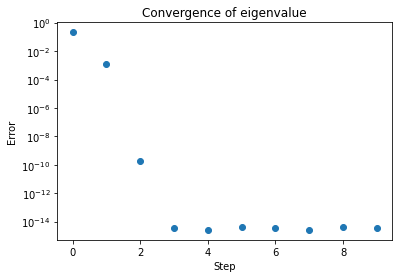

In [2]:
import numpy
import matplotlib.pyplot as plt

m = 3
A = numpy.array([[2, 1, 1], [1, 3, 1], [1, 1, 4]])

num_steps = 10
v = numpy.empty((num_steps, m))
lam = numpy.empty(num_steps)

v[0, :] = numpy.array([1, 1, 1])
v[0, :] = v[0, :] / numpy.linalg.norm(v[0, :], ord=2)
lam[0] = numpy.dot(v[0,:], numpy.dot(A, v[0, :]))
for k in range(1, num_steps):
    w = numpy.linalg.solve(A - lam[k-1] * numpy.identity(m), v[k-1, :])
    v[k, :] = w / numpy.linalg.norm(w, ord=2)
    lam[k] = numpy.dot(v[k,:], numpy.dot(A, v[k, :]))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(range(10), numpy.abs(lam - numpy.linalg.eigvals(A)[0]), 'o')

axes.set_title("Convergence of eigenvalue")
axes.set_xlabel("Step")
axes.set_ylabel("Error")

plt.show()

## QR Algorithm

The most basic use of a $QR$ factorization to find eigenvalues is to iteratively compute the factorization and multiply the resulting $Q$ and $R$ in the reverse order.  This sequence will eventually converge to the Schur decomposition of the matrix $A$.

In [3]:
%precision 6
m = 3
A = numpy.array([[2, 1, 1], [1, 3, 1], [1, 1, 4]])
MAX_STEPS = 10

for i in range(MAX_STEPS):
    Q, R = numpy.linalg.qr(A)
    A = numpy.dot(R, Q)
    print()
    print("A(%s) =" % (i))
    print(A)

print()
print("True eigenvalues: ")
print(numpy.linalg.eigvals(A))
print()
print("Computed eigenvalues: ")
for i in range(m):
    print(A[i, i])


A(0) =
[[ 4.166667e+00  1.095445e+00 -1.267105e+00]
 [ 1.095445e+00  2.000000e+00  3.187966e-17]
 [-1.267105e+00  2.153667e-16  2.833333e+00]]

A(1) =
[[ 5.090909  0.15743   0.623249]
 [ 0.15743   1.86182  -0.54704 ]
 [ 0.623249 -0.54704   2.047271]]

A(2) =
[[ 5.198682 -0.075903 -0.207275]
 [-0.075903  2.181835  0.496554]
 [-0.207275  0.496554  1.619484]]

A(3) =
[[ 5.211648 -0.065892  0.058223]
 [-0.065892  2.363696 -0.321368]
 [ 0.058223 -0.321368  1.424655]]

A(4) =
[[ 5.213778 -0.035826 -0.01528 ]
 [-0.035826  2.430805  0.183737]
 [-0.01528   0.183737  1.355417]]

A(5) =
[[ 5.214202e+00 -1.758371e-02  3.920120e-03]
 [-1.758371e-02  2.451920e+00 -1.007513e-01]
 [ 3.920120e-03 -1.007513e-01  1.333877e+00]]

A(6) =
[[ 5.214294e+00 -8.392060e-03 -9.988671e-04]
 [-8.392060e-03  2.458212e+00  5.453885e-02]
 [-9.988671e-04  5.453885e-02  1.327494e+00]]

A(7) =
[[ 5.214314e+00 -3.973357e-03  2.540044e-04]
 [-3.973357e-03  2.460055e+00 -2.940989e-02]
 [ 2.540044e-04 -2.940989e-02  1.32563

So why does this work?  The first step is to find the $QR$ factorization of $A^{(k-1)}$ which is equivalent to finding

$$
    (Q^{(k)})^T A^{(k-1)} = R^{(k)}
$$

and multiplying on the right leads to

$$
    (Q^{(k)})^T A^{(k-1)} Q^{(k)} = R^{(k)} Q^{(k)}.
$$

In this way we can see that this is a similarity transformation of the matrix $A^{(k-1)}$ since the $Q^{(k)}$ is an orthogonal matrix ($Q^{-1} = Q^T$). This of course is not a great idea to do directly but works great in this case as we iterate to find the upper triangular matrix $R^{(k)}$ which is exactly where the eigenvalues appear.

In practice this basic algorithm is modified to include a few additions:

1. Before starting the iteration $A$ is reduced to tridiagonal form.
1. Motivated by the inverse power iteration we observed we instead consider a shifted matrix $A^{(k)} - \mu^{(k)} I$ for factoring.  The $\mu$ picked is related to the estimate given by the Rayleigh quotient.  Here we have

$$
    \mu^{(k)} = \frac{(q_m^{(k)})^T A q_m^{(k)}}{(q_m^{(k)})^T q_m^{(k)}} = (q_m^{(k)})^T A q_m^{(k)}.
$$

1. Deflation is used to reduce the matrix $A^{(k)}$ into smaller matrices once (or when we are close to) finding an eigenvalue to simplify the problem.

This has been the standard approach until recently for finding eigenvalues of a matrix.

## Alternatives

### Jacobi

Jacobi iteration employs the idea that we know the eigenvalues of a matrix of size equal to or less than 4 (we know the roots of the characteristic polynomial directly).  Jacobi iteration therefore attempts to break the matrix down into at most 4 by 4 matrices along the diagonal via a series of similarity transformations based on only diagonalizing sub-matrices 4 by 4 or smaller.

### Bisection 

It turns out if you do not want all of the eigenvalues of a matrix that using a bisection method to find some subset of the eigenvalues is often the most efficient way to get these.  This avoids the pitfall of trying to find the eigenvalues via other root-finding approaches by only needing evaluations of the function and if a suitable initial guess is provided can find the eigenvalue quickly that is closest to the initial bracket provided.

### Divide-and-conquer

This algorithm is actually the one used most often used if both eigenvalues and eigenvectors are needed and performs up to twice as fast as the $QR$ approach.  The basic idea is to split the matrix into two pieces at every iteration by introducing zeros on the appropriate off-diagonals which neatly divides the problem into two pieces.